## Computer Exercise #05 ##

### Load the Common Imports ###

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D
from keras.models import Sequential
from keras.layers import Dropout
from keras import layers
from keras.layers import BatchNormalization
import h5py

print(keras.__version__)

2.4.3


# Load Mat Files


In [2]:
f = h5py.File('ML_Phase_1.mat','r')
arrays = {}

for k, v in f.items():
    arrays[k] = np.array(v)

    
    


### Load the Dataset ###

In [28]:
print(arrays.keys())
datOut= arrays['datOut']

numOfDat = datOut.shape[0]

heartLabels = arrays['heartActualMat']
heartLabels = heartLabels.transpose()
heartLabels = heartLabels[:,0:numOfDat]

respLabels = arrays['respActualMat']
respLabels = respLabels.transpose()
respLabels = respLabels[:,0:numOfDat]
#print(datOut.shape) # 20 thousand different trials each is 16k samples long. +


datLabels = np.empty((2,numOfDat))


datLabels[0,:] = respLabels
datLabels[1,:] = heartLabels

datLabels= datLabels.transpose()

print('fuck:',datLabels.shape)
tNum = datOut.shape[0]


maxFreq = 1


percentTrain = .9;
trainEndEx = round(tNum*percentTrain)

firstLayerLength = 2000

x_train = datOut[0:trainEndEx,100:]
y_train = datLabels[0:trainEndEx,:] / maxFreq

x_test = datOut[trainEndEx+1:,100:]
y_test = datLabels[trainEndEx+1:numOfDat,:]/maxFreq


# input image dimensions
img_x, img_y = 28, 28
#Reshape the data into a 4d tensor
#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
#input_shape = ( x_train.shape[1], 1, 1)
print(x_test.shape)

#x_train = x_train.reshape(-1,firstLayerLength)
#x_test = x_test.reshape(-1,firstLayerLength)


# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_test.shape)
print(y_train.shape)


dict_keys(['datOut', 'heartActualMat', 'offSetVec', 'respActualMat'])
fuck: (10309, 2)
(1030, 1900)
x_train shape: (9278, 1900)
9278 train samples
1030 test samples
(1030, 2)
(9278, 2)


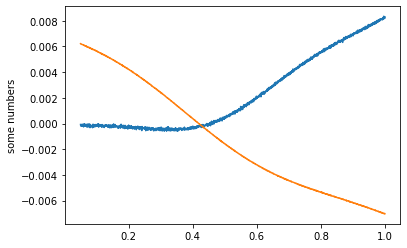

[0.29422292 1.62517592]


In [29]:
x = 500
t = np.arange(0,1,1/2000)
t = t[100:firstLayerLength]

plt.plot(t,x_train[x,:],t,x_train[1,:])
plt.ylabel('some numbers')
plt.show()
print(y_train[x])

# Set up Model


model = Sequential()


model.add(Conv1D(5, 1, input_shape=(x_train.shape[1], 1)))
model.add(Flatten())

In [30]:
model = Sequential()
#model.add(Conv1D(5, 5, input_shape=(x_train.shape[1], 1)))
model.add(Input(shape=(x_train.shape[1], )))

model.add(Dense(2,input_shape  = (x_train.shape[1],)))
model.add(Dense(2))
model.add(Dense(3))
model.add(Dense(2))

In [31]:
#model.compile(loss=keras.losses.mean_squared_logarithmic_error,
#              optimizer=keras.optimizers.Adam(),
#                  metrics=[keras.metrics.MeanSquaredError()])
#model.summary()

model.compile(loss=keras.losses.mean_absolute_percentage_error,
              optimizer=keras.optimizers.Nadam(learning_rate=0.001),metrics=[keras.metrics.mape])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 3802      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 8         
Total params: 3,825
Trainable params: 3,825
Non-trainable params: 0
_________________________________________________________________


### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

In [42]:
batch_size = 1  # Set the batch size
epochs = 10 # Set the number of epochs
# One Hidden Layer
print(model.inputs[0].dtype)


<dtype: 'float32'>


### Train the Model ###

In [43]:
# One Hidden Layer
initializer = keras.initializers.RandomNormal(mean=0., stddev=5.)

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.18,
          callbacks=None)



score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7607/7607 [==============================] - 13s 2ms/step - loss: 4.0901 - mean_absolute_percentage_error: 4.0901 - val_loss: 3.8632 - val_mean_absolute_percentage_error: 3.8632
Epoch 2/10
7607/7607 [==============================] - 11s 1ms/step - loss: 3.9356 - mean_absolute_percentage_error: 3.9356 - val_loss: 4.3623 - val_mean_absolute_percentage_error: 4.3623
Epoch 3/10
7607/7607 [==============================] - 14s 2ms/step - loss: 3.8565 - mean_absolute_percentage_error: 3.8565 - val_loss: 3.6515 - val_mean_absolute_percentage_error: 3.6515
Epoch 4/10
7607/7607 [==============================] - 14s 2ms/step - loss: 3.7873 - mean_absolute_percentage_error: 3.7873 - val_loss: 3.5173 - val_mean_absolute_percentage_error: 3.5173
Epoch 5/10
7607/7607 [==============================] - 13s 2ms/step - loss: 3.7506 - mean_absolute_percentage_error: 3.7506 - val_loss: 3.4302 - val_mean_absolute_percentage_error: 3.4302
Epoch 6/10
7607/7607 [==============================] -

In [44]:
fEst = model.predict(x_test)


print(fEst)
print(y_test)

[[0.2722237  1.3336561 ]
 [0.27246672 1.5299618 ]
 [0.27198148 1.1301855 ]
 ...
 [0.27208123 1.2207043 ]
 [0.2720218  1.1498557 ]
 [0.27210462 1.2359872 ]]
[[0.29278208 1.3293886 ]
 [0.27069149 1.49454665]
 [0.28374281 1.13397253]
 ...
 [0.27224803 1.23506765]
 [0.27196406 1.15769332]
 [0.29915549 1.2248663 ]]


# Old Code ( for 2d Image CNN)
model = Sequential()
model.add(Input(shape=(32,32,1)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Dropout(rate = .01,seed = 7))
model.add(MaxPooling2D(pool_size=(5, 5),strides=(2,2),padding='same'))
model.add(Conv2D(64, (7,7), activation='relu'))

model.add(BatchNormalization(axis=3,trainable=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


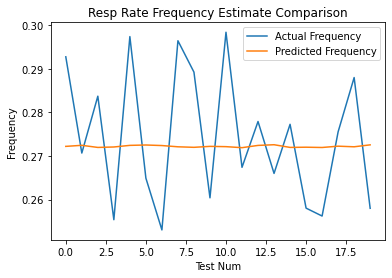

In [52]:
numShow = 20
t = np.arange(0,numShow,1)
plt.plot(t,y_test[0:numShow,0], t, fEst[0:numShow,0])
plt.ylabel('Frequency')
plt.xlabel('Test Num')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Resp Rate Frequency Estimate Comparison')
plt.show()


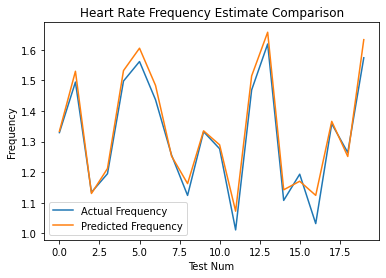

In [54]:
numShow = 20
t = np.arange(0,numShow,1)
plt.plot(t,y_test[0:numShow,1], t, fEst[0:numShow,1])
plt.ylabel('Frequency')
plt.xlabel('Test Num')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Heart Rate Frequency Estimate Comparison')
plt.show()

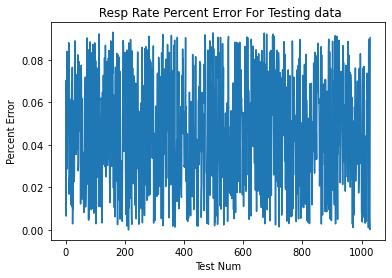

In [58]:
t = np.arange(0,1030,1)
plt.plot(t,abs(y_test[:,0]-fEst[:,0])/y_test[:,0])
plt.ylabel('Percent Error')
plt.xlabel('Test Num')
plt.title(' Resp Rate Percent Error For Testing data')
plt.show()

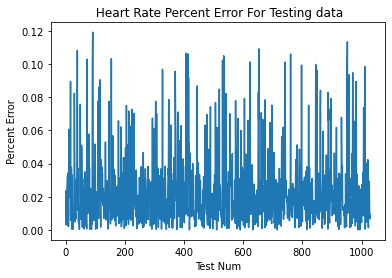

In [59]:
t = np.arange(0,1030,1)
plt.plot(t,abs(y_test[:,1]-fEst[:,1])/y_test[:,1])
plt.ylabel('Percent Error')
plt.xlabel('Test Num')
plt.title(' Heart Rate Percent Error For Testing data')
plt.show()